In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data= pd.read_csv('data/HealthCareSpending.csv')

In [3]:
df = data.dropna()
df.shape

(184, 23)

In [4]:
df_trans = df.set_index(['Region', 'IncomeGroup','Country Name']).transpose()

In [5]:
df_trans.index.name = 'Year'

In [6]:
df_trans.head()

Region        Sub-Saharan Africa Europe & Central Asia              \
IncomeGroup  Lower middle income   Upper middle income High income   
Country Name              Angola               Albania     Andorra   
Year                                                                 
1995                    6.458878              6.597079    5.808000   
1996                    2.814732              7.431974    6.094333   
1997                    3.482559              7.568100    6.144922   
1998                    3.335602              6.943299    7.755926   
1999                    3.377844              6.868190    5.728308   

Region       Middle East & North Africa Latin America & Caribbean  \
IncomeGroup                 High income       Upper middle income   
Country Name       United Arab Emirates                 Argentina   
Year                                                                
1995                           2.636132                  8.310993   
1996                           2.459025                  8.024994   
1997                           2.487064                  8.361362   
1998                           2.894392                  8.535926   
1999                           2.713788                  9.355149   

Region       Europe & Central Asia Latin America & Caribbean  \
IncomeGroup    Lower middle income               High income   
Country Name               Armenia       Antigua and Barbuda   
Year                                                           
1995                      6.418736                  4.143613   
1996                      5.790757                  3.920970   
1997                      5.767589                  3.939307   
1998                      5.756172                  3.920207   
1999                      5.681791                  3.961047   

Region       East Asia & Pacific Europe & Central Asia                      \
IncomeGroup          High income           High income Upper middle income   
Country Name           Australia               Austria          Azerbaijan   
Year                                                                         
1995                    7.259735              9.547024            5.791876   
1996                    7.443047              9.527301            6.123914   
1997                    7.499228              9.825216            5.451976   
1998                    7.662702              9.997434            5.434660   
1999                    7.789759             10.187587            5.357144   

Region               ...         North America Europe & Central Asia  \
IncomeGroup          ...           High income   Lower middle income   
Country Name         ...         United States            Uzbekistan   
Year                 ...                                               
1995                 ...             13.086654              6.744930   
1996                 ...             13.044098              7.125137   
1997                 ...             12.962642              6.815846   
1998                 ...             12.987338              6.305210   
1999                 ...             12.990051              5.535808   

Region            Latin America & Caribbean               East Asia & Pacific  \
IncomeGroup             Upper middle income               Lower middle income   
Country Name St. Vincent and the Grenadines Venezuela, RB             Vietnam   
Year                                                                            
1995                               6.723120      5.424068            5.187511   
1996                               6.730346      4.727528            5.051860   
1997                               7.477974      4.058390            4.877388   
1998                               6.805095      4.443947            4.918482   
1999                               6.468015      4.919664            4.883508   

Region                                     Middle East & North Africa  \
IncomeGroup    

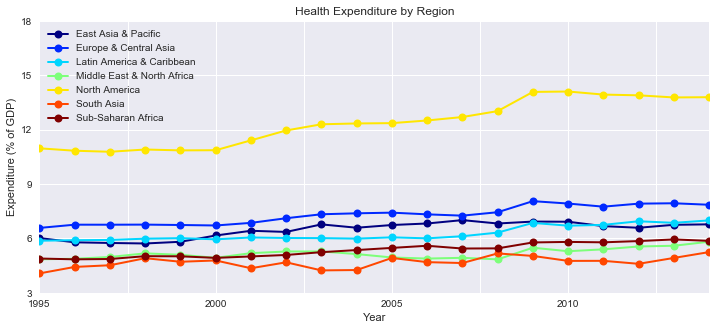

In [7]:
by_region = df_trans.groupby(level=0, axis=1).mean()
by_region.to_csv('data/HealthExpenditurebyRegion.csv')
ax = by_region.plot(figsize=(12,5),lw=2,colormap='jet', legend=True, linestyle='-', marker='o', markersize=8,title='Health Expenditure by Region')
ax.set(ylabel ='Expenditure (% of GDP)', xlabel ='Year')
ax.set_yticks([3,6,9, 12,15,18])
plt.legend(loc='upper left')

plt.savefig('HealthExpenditurebyRegion.png')
plt.show()

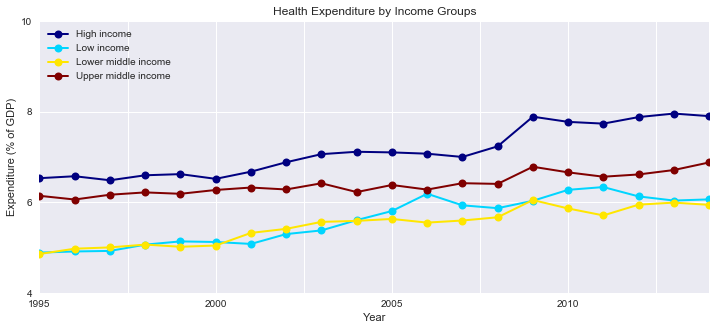

In [8]:
by_IncomeGroup = df_trans.groupby(level=1, axis=1).mean()
by_IncomeGroup.to_csv('data/HealthExpenditurebyIncomeGroup.csv')
ax = by_IncomeGroup.plot(figsize=(12,5),lw=2,colormap='jet', legend=True, linestyle='-', marker='o', markersize=8,title='Health Expenditure by Income Groups')
ax.set_yticks([4,6,8,10])
ax.set(ylabel ='Expenditure (% of GDP)', xlabel ='Year')
plt.legend(loc='upper left')
plt.savefig('HealthExpenditurebyIncomeGroup.png')
plt.show()

In [9]:
df_US = df[df['Country Name'] == 'United States']
US = df_US.iloc[:,3:].T

In [10]:
df_hiwous =df[(df['IncomeGroup'] == 'High income')&(df['Country Name'] != 'United States')]
df_hiwous_avg = pd.DataFrame(df_hiwous.iloc[:, 2:].mean(axis=0))

In [11]:
high_income = pd.concat([US,df_hiwous_avg], axis=1)
high_income.columns = ['United States', 'Others']
high_income.index.name = 'Year'
high_income.to_csv('data/highincome_health_expenditure.csv')

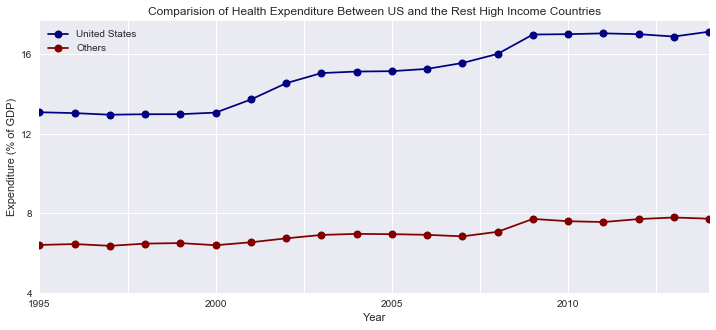

In [12]:
ax = high_income.plot(figsize=(12,5),colormap='jet', legend=True, linestyle='-', marker='o', markersize=8,title='Comparision of Health Expenditure Between US and the Rest High Income Countries')
ax.set_yticks([4,8, 12,16])
ax.set(ylabel ='Expenditure (% of GDP)', xlabel ='Year')
plt.legend(loc='upper left')
plt.savefig('HealthExpenditureComparisionHighIncome.png')
plt.show()

In [13]:
df_nawous =df[(df['Region'] == 'North America')&(df['Country Name'] != 'United States')]
df_nawous_avg = pd.DataFrame(df_nawous.iloc[:, 3:].T)

In [14]:
north_america = pd.concat([US,df_nawous_avg], axis=1)
north_america.columns = ['United States', 'Canada']
north_america.index.name = 'Year'
north_america.to_csv('data/northamerica_health_expenditure.csv')

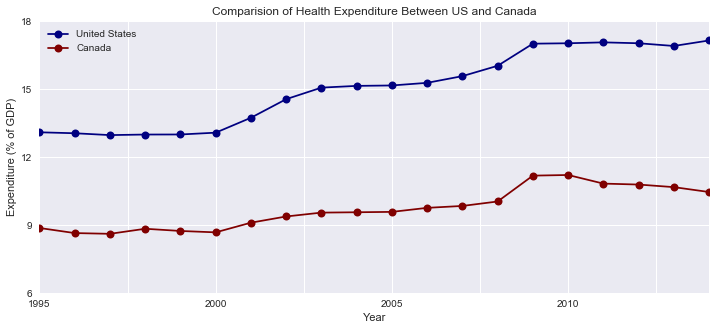

In [15]:
ax = north_america.plot(figsize=(12,5),colormap='jet', legend=True, linestyle='-', marker='o', markersize=8,title='Comparision of Health Expenditure Between US and Canada')
ax.set_yticks([6,9, 12,15,18])
ax.set(ylabel ='Expenditure (% of GDP)', xlabel ='Year')
plt.legend(loc='upper left')
plt.savefig('HealthExpenditureComparisionNorthAmerican.png')
plt.show()

In [16]:
df_contries = df.iloc[:, 2:].set_index('Country Name').transpose()
df_contries.index.name = 'Year'
major_countries = ['Brazil', 'Canada', 'China', 'Germany', 'India', 'Japan', 'South Africa','United Kingdom', 'United States']
majorcountries = df_contries.loc[:, major_countries]
majorcountries.to_csv('data/majorcountries_health_expenditure.csv')

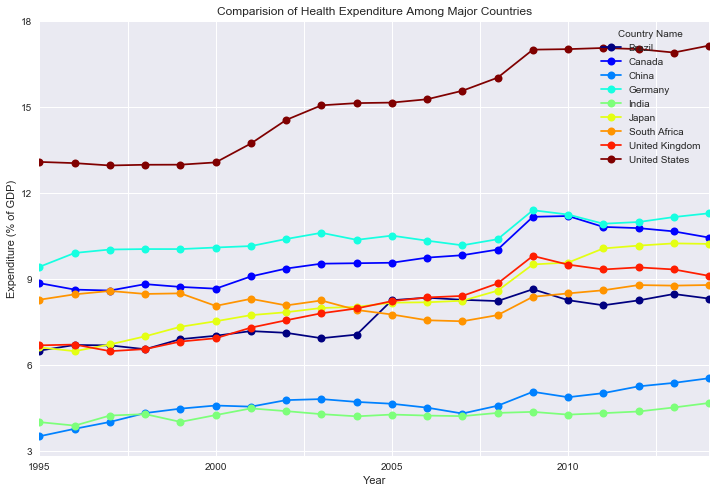

In [17]:
ax = majorcountries.plot(figsize=(12,8),colormap='jet', legend=True, linestyle='-', marker='o', markersize=8,title='Comparision of Health Expenditure Among Major Countries')
ax.set_yticks([3,6,9,12,15,18])
ax.set(ylabel ='Expenditure (% of GDP)', xlabel ='Year')
#plt.legend(loc='upper left')
plt.savefig('MajorCountriesHealthExpenditureComparision.png')
plt.show()